In [0]:
!pip install https://github.com/PyThaiNLP/pythainlp/archive/dev.zip
!pip install rouge

     / 19.7MB 135kB/s
     |████████████████████████████████| 1.4MB 2.8MB/s 
     |████████████████████████████████| 747kB 19.4MB/s 
  Created wheel for pythainlp: filename=pythainlp-2.2.0.dev1-cp36-none-any.whl size=13151687 sha256=68b4431097dbbfda44c29ef3116c2d91dc5a2a6871100d30907e3b254131415c
  Stored in directory: /tmp/pip-ephem-wheel-cache-zlyyf9yt/wheels/79/4e/1e/26f3198c6712ecfbee92928ed1dde923a078da3d222401cc78
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434677 sha256=433cc3fd30d94990ca972f64cb129720b6f23ad15c07acdd329669afb4769722
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built pythainlp nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [0]:
!pip install deepcut

     |████████████████████████████████| 2.0MB 2.8MB/s 


In [0]:
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split

import pythainlp
from tqdm import tqdm_notebook
from rouge import Rouge 

from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pickle
import pandas as pd
drive.mount('/gdrive')

import unicodedata
import re
import numpy as np
import os
import io
import time

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import pickle
THAIGOV_PATH = '/gdrive/Shared drives/NeuroSummary/data/b_data_playground/'
with open(THAIGOV_PATH + 'thai_gov_clean_cut.pkl', 'rb') as f:
  df = pickle.load(f)
with open(THAIGOV_PATH + 'thai_gov_stop_clean_cut.pkl', 'rb') as f:
  df_stop = pickle.load(f)

eliminate len 0

In [0]:
df_stop[df_stop.content.apply(lambda x: len(x) == 0)]
df[df.content.apply(lambda x: len(x) == 0)]

,content,headline,class


In [0]:
def avg_f1_rouge(hyp, label):
    rouge = Rouge()
    t = rouge.get_scores(' '.join(hyp), ' '.join(label))[0]
    return t['rouge-1']['f']+2*t['rouge-2']['f']+t['rouge-l']['f']

In [0]:
df

,content,headline,class
0,"[ธนาคารอาคารสงเคราะห์, ธอส., ประกาศ, มาตรการ, ...","[ธอส., ประกาศ, มาตรการ, บรรเทา, ความ, เดือดร้อ...",ด้านเศรษฐกิจ
1,"[พลเอก ประยุทธ์ จันทร์โอชา, นายก, รัฐมนตรี, ได...","[สรุป, ประเด็น, นายก, รัฐมนตรี, กล่าว, ใน, ราย...",ข่าวทำเนียบรัฐบาล
2,"[รมว., แรงงาน, ยื่น, สัตยาบัน, อนุสัญญา, ILO, ...","[บิ๊กอู๋, ยื่น, สัตยาบัน, C, 188, ต่อ, ILO, แส...",ด้านความมั่นคง
3,"[ออมสิน, จัด, โปรพิเศษ, Thailand, Smart, Money...","[ออมสิน, จัด, โปรโมชั่น, พิเศษ, Thailand, Smar...",ด้านเศรษฐกิจ
4,"[ศ.คลินิก, นพ.อุดม คชินทร, รมช., ศธ., ประชุม,...","[ม., มหิดล, เตรียม, ร่วมมือ, กับ, ม.บูรพา ผลิต...",ด้านการศึกษาฯ
...,...,...,...
17362,"[ที่, ประชุม, มี, มติ, เห็น, ชอบ, ร่าง, แผน, ป...","[รอง, นรม., พลเรือ, เอก ณรงค์, ฯ, เป็น, ประธาน...",ข่าวทำเนียบรัฐบาล
17363,"[วัน, นี้, 22, สิงหาคม, 2559, เวลา, 14, ., 00,...","[นายก, รัฐมนตรี, ยืนยัน, รัฐบาล, มุ่งมั่น, ใน,...",ข่าวทำเนียบรัฐบาล
17364,"[วัน, นี้, 22, สิงหาคม, 2559, เวลา, 14, ., 00,...","[นายก, รัฐมนตรี, ย้ำ, รัฐบาล, มุ่ง, พัฒนา, โคร...",ข่าวทำเนียบรัฐบาล
17365,"[วัน, นี้, 25, ส.ค., 59, เวลา, 09, ., 00, น., ...","[คปท., เห็น, ชอบ, การ, จัดทำ, แผน, ปฏิบัติการ,...",ข่าวทำเนียบรัฐบาล


In [0]:
len(df['content'].iloc[0])

1064

In [0]:
print(df['content'].iloc[0])

['ธนาคารอาคารสงเคราะห์', 'ธอส.', 'ประกาศ', 'มาตรการ', 'บรรเทา', 'ความ', 'เดือดร้อน', 'ให้', 'กับ', 'ลูกค้า', 'ของ', 'ธนาคาร', 'ที่', 'ได้', 'รับ', 'ผล', 'กระทบ', 'จาก', 'อิทธิพล', 'ของ', 'พายุ', 'โซนร้อน', 'ปาบึก', 'เพิ่มเติม', 'ด้วย', 'มาตรการ', 'พิจารณา', 'สินไหม', 'เร่งด่วน', 'Fastrack', 'ธนาคารอาคารสงเคราะห์', 'ธอส.', 'ประกาศ', 'มาตรการ', 'บรรเทา', 'ความ', 'เดือดร้อน', 'ให้', 'กับ', 'ลูกค้า', 'ของ', 'ธนาคาร', 'ที่', 'ได้', 'รับ', 'ผล', 'กระทบ', 'จาก', 'อิทธิพล', 'ของ', 'พายุ', 'โซนร้อน', 'ปาบึก', 'เพิ่มเติม', 'ด้วย', 'มาตรการ', 'พิจารณา', 'สินไหม', 'เร่งด่วน', 'Fastrack', 'สำหรับ', 'ลูกค้า', 'ที่', 'ทำ', 'กรมธรรม์', 'ประกัน', 'อัคคีภัย', 'สำหรับ', 'ที่อยู่อาศัย', 'ซึ่ง', 'คุ้มครอง', 'ภัย', 'ธรรมชาติ', 'รวม', 'ถึง', 'กรณี', 'น้ำ', 'ท่วม', 'หรือ', 'ลม', 'พายุ', 'พิจารณา', 'จ่าย', 'ค่า', 'สินไหม', 'ให้', 'กับ', 'ลูกค้า', 'ที่', 'เป็น', 'ผู้', 'ประสบ', 'ภัย', 'ทุก', 'ราย', 'อย่าง', 'เร่งด่วน', 'เป็น', 'กรณี', 'พิเศษ', '15', '000', 'บาท', 'และ', 'หาก', 'ประเมิน', 'ความ', 'เสียหาย', 'ของ

In [0]:
''.join(df['headline'].iloc[0])

'ธอส.ประกาศมาตรการบรรเทาความเดือดร้อนลูกค้าจากพายุโซนร้อนปาบึกเพิ่มเติมพิจารณาจ่ายค่าสินไหมทุกรายเร่งด่วนสูงสุด20000บาท'

In [0]:
# pythainlp.tokenize.sent_tokenize(' '.join(df['content'].iloc[0]))
[' '.join(df['content'].iloc[0][i:i+10]) for i in range(0, len(df['content'].iloc[0]),10)]

['ธนาคารอาคารสงเคราะห์ ธอส. ประกาศ มาตรการ บรรเทา ความ เดือดร้อน ให้ กับ ลูกค้า',
 'ของ ธนาคาร ที่ ได้ รับ ผล กระทบ จาก อิทธิพล ของ',
 'พายุ โซนร้อน ปาบึก เพิ่มเติม ด้วย มาตรการ พิจารณา สินไหม เร่งด่วน Fastrack',
 'ธนาคารอาคารสงเคราะห์ ธอส. ประกาศ มาตรการ บรรเทา ความ เดือดร้อน ให้ กับ ลูกค้า',
 'ของ ธนาคาร ที่ ได้ รับ ผล กระทบ จาก อิทธิพล ของ',
 'พายุ โซนร้อน ปาบึก เพิ่มเติม ด้วย มาตรการ พิจารณา สินไหม เร่งด่วน Fastrack',
 'สำหรับ ลูกค้า ที่ ทำ กรมธรรม์ ประกัน อัคคีภัย สำหรับ ที่อยู่อาศัย ซึ่ง',
 'คุ้มครอง ภัย ธรรมชาติ รวม ถึง กรณี น้ำ ท่วม หรือ ลม',
 'พายุ พิจารณา จ่าย ค่า สินไหม ให้ กับ ลูกค้า ที่ เป็น',
 'ผู้ ประสบ ภัย ทุก ราย อย่าง เร่งด่วน เป็น กรณี พิเศษ',
 '15 000 บาท และ หาก ประเมิน ความ เสียหาย ของ ที่อยู่อาศัย',
 'แล้ว พบ ว่า สูง กว่า 15 000 บาท หรือ มี',
 'น้ำ ท่วม ตัว ที่อยู่อาศัย ตั้งแต่ 100 เซนติเมตร ขึ้น ไป ลูกค้า',
 'มี สิทธิ์ ได้ รับ ค่า สินไหม ตาม จริง แต่ ไม่',
 'เกิน 20 000 บาท ติดต่อ เพื่อ ขอ รับ การ พิจารณา',
 'สินไหม เร่งด่วน ได้ ที่ สาขา ของ ธนาคารอาคารสงเคราะห์

In [0]:
def parse_data(idx, k, df=df):
    sentences = [df['content'].iloc[idx][i:i+k] for i in range(0, len(df['content'].iloc[idx]),k)]
    gold_summary = df['headline'].iloc[idx]
    selected = []
    y = np.zeros(len(sentences))
    best_avg_f1 = 0
    candidate = []
    # for i in range(len(sentences)):
    #     mx = 0
    #     mxpos = 0
    #     for j in range(len(sentences)):
    #         if y[j] == 1:
    #             continue
    #         _t = []
    #         for c in sorted(candidate+[j]):
    #             _t += sentences[c]
    #         if(len(_t) == 0):
    #             continue
    #         try:
    #             avg_f1 = avg_f1_rouge(_t, gold_summary)
    #         except:
    #             continue
    #         if avg_f1 > mx:
    #             mx = avg_f1
    #             mxpos = j
    #     if mx > best_avg_f1:
    #         best_avg_f1 = mx
    #         candidate.append(mxpos)
    #         y[mxpos] = 1
    # print(candidate)
    # for c in sorted(candidate):
    #     selected += sentences[c]
    
    val = []
    for i in range(len(sentences)):
        if len(sentences[i]) == 0:
            continue
        val.append((i, avg_f1_rouge(sentences[i], gold_summary)))
    val = sorted(val, key=lambda tup: tup[1])[::-1]
    _t = []
    for i in range(len(val)):
        _t = []
        for c in sorted(candidate+[val[i][0]]):
            _t += sentences[c]
        avg_f1 = avg_f1_rouge(_t, gold_summary)
        if avg_f1 > best_avg_f1:
            best_avg_f1 = avg_f1
            candidate.append(val[i][0])
    for c in sorted(candidate):
        selected += sentences[c]
        y[c] = 1
    best_avg_f1 = avg_f1_rouge(selected, gold_summary)
    # print('hyp:',''.join(selected))
    # print('gol:',''.join(df['headline'].iloc[idx]))
    # print('labels',y)
    # print('best_f1:',best_avg_f1)
    # print()
    return y

In [0]:
for i in range(20):
    f(i,8)

hyp: ธนาคารอาคารสงเคราะห์ธอส.ประกาศมาตรการบรรเทาความเดือดร้อนให้กระทบจากอิทธิพลของพายุโซนร้อนปาบึกเพิ่มเติมพายุพิจารณาจ่ายค่าสินไหมให้กับลูกค้า20000บาททั้งนี้สามารถติดต่อเพื่อขอ
gol: ธอส.ประกาศมาตรการบรรเทาความเดือดร้อนลูกค้าจากพายุโซนร้อนปาบึกเพิ่มเติมพิจารณาจ่ายค่าสินไหมทุกรายเร่งด่วนสูงสุด20000บาท
best_f1: 2.0497607458289533

hyp: รายการศาสตร์พระราชา สู่การพัฒนาอย่างยั่งยืนทางสถานีโทรทัศน์รวมการเฉพาะกิจแห่งประเทศไทยในวันศุกร์ที่8กุมภาพันธ์2562
gol: สรุปประเด็นนายกรัฐมนตรีกล่าวในรายการศาสตร์พระราชา สู่การพัฒนาอย่างยั่งยืนวันศุกร์ที่8กุมภาพันธ์2562
best_f1: 2.5653594571896496

hyp: ILOแสดงเจตจำนงของรัฐบาลไทยยกระดับมาตรฐานสากลเมื่อวันที่30มกราคม2562ใบเหลืองของภาคประมงไทยอันแสดงประเทศไทยได้เข้ายื่นสัตยาบันอนุสัญญาILOฉบับ
gol: บิ๊กอู๋ยื่นสัตยาบันC188ต่อILOแสดงเจตนารมณ์ไทยคุ้มครองภาคประมงสู่มาตรฐานสากล
best_f1: 0.9500987963665356

hyp: ออมสินจัดโปรพิเศษThailandSmartMoneyกรุงเทพฯ14–16ธ.ค.นี้พบเงินฝากประเภท
gol: ออมสินจัดโปรโมชั่นพิเศษThailandSmartMoneyกรุงเทพฯ14–16ธ.ค.นี้
best_f1: 2.927697

hyp: พระราชา สู่การพัฒนาอย่างยั่งยืนทางสถานีโทรทัศน์รวมการเฉพาะกิจแห่งประเทศไทยในวันศุกร์ที่8กุมภาพันธ์2562เวลาท้ายนายกรัฐมนตรีกล่าวว่า
gol: สรุปประเด็นนายกรัฐมนตรีกล่าวในรายการศาสตร์พระราชา สู่การพัฒนาอย่างยั่งยืนวันศุกร์ที่8กุมภาพันธ์2562
best_f1: 2.663157874789543

hyp: ILOฉบับที่188ว่ากล่าวเป็นการแสดงเจตนารมณ์มาตรฐานสากลและป้องกันความในภาคประมงต่อไปคุ้มครองแรงงานในภาคประมงประเทศไทยได้เข้ายื่นสัตยาบัน
gol: บิ๊กอู๋ยื่นสัตยาบันC188ต่อILOแสดงเจตนารมณ์ไทยคุ้มครองภาคประมงสู่มาตรฐานสากล
best_f1: 1.1644452433157457

hyp: ออมสินจัดโปรพิเศษThailandSmartMoneyกรุงเทพฯ14–16ธ.ค.นี้พบเงินฝากธนาคารออมสินนำเสนอโปรโมชั่นพิเศษThailandSmartMoneyกรุงเทพฯครั้ง
gol: ออมสินจัดโปรโมชั่นพิเศษThailandSmartMoneyกรุงเทพฯ14–16ธ.ค.นี้
best_f1: 2.7409356542087635

hyp: มาช่วยผลิตพัฒนากำลังคนให้สอดคล้องกับภาคอุตสาหกรรมในพื้นที่โดยม.มหิดล-บูรพาจะร่วมฝึกอบรมระยะสั้นและส่งเสริมTechnicalพัฒนากำลังคนให้สอดคล้องกับภาคอุตสาหกรรมและลดทักษะภาษาอังกฤษในวิชาชีพ
gol: ม.มหิดลเตรียมร่วมมือกับม.บูรพา ผลิตพัฒนากำลังคนให้สอดคล้องก

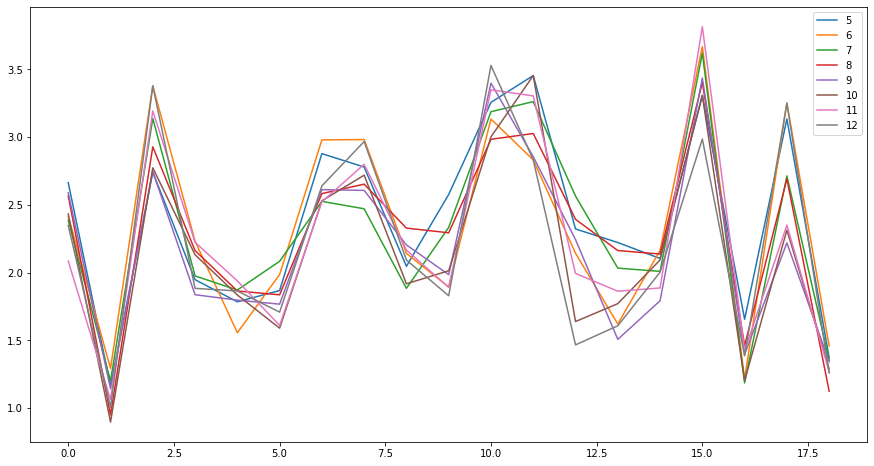

In [0]:
plt.figure(figsize=(15,8))
for j in range(5,13):
    t = []
    for i in range(1,20):
        val = f(i, j)
        t.append(val)
    plt.plot(t, label=j)
plt.legend()

this data has no zero len

In [0]:
with open(THAIGOV_PATH + 'thai_gov_split/train_v2.pkl', 'rb') as f:
  train_set = pickle.load(f)
with open(THAIGOV_PATH + 'thai_gov_split/val_v2.pkl', 'rb') as f:
  val_set = pickle.load(f)
with open(THAIGOV_PATH + 'thai_gov_split/test_v2.pkl', 'rb') as f:
  test_set = pickle.load(f)

In [0]:
len(train_set), len(val_set), len(test_set)

(11615, 2861, 2861)

In [0]:
train_set

,content,headline,class
11629,"[กระทรวงทรัพยากรธรรมชาติ, และสิ่ง, แวดล้อม, โด...","[ทส., จัด, การ, ประชุม, การ, ลด, ปริมาณ, ขยะ, ...",ด้านความมั่นคง
8470,"[วัน, นี้, 28, มิถุนายน, 2560, เวลา, 11, ., 30...","[นายก, รัฐมนตรี, เผย, ต้องการ, ให้, การ, เปลี่...",ข่าวทำเนียบรัฐบาล
6389,"[เมื่อ, วัน, จันทร์, ที่, 9, กรกฎาคม, 2561, เว...","[ม.ล.ปนัดดาฯ, กล่าว, สุนทรพจน์, ใน, พิธี, เปิด...",ด้านกฎหมายฯ
1058,"[รอง, ปลัด, กระทรวงดิจิทัลฯ, นางวรรณพร เทพหัสด...","[รอง, ปลัด, กระทรวงดิจิทัลฯ, เปิด, งาน, การ, พ...",ด้านสังคม
6155,"[รัฐบาล, เร่งรัด, ขับ, เคลื่อน, งาน, สำคัญ, เพ...","[เร่ง, เดินหน้า, 5, โครงการ, ลด, ความ, เหลื่อม...",รายการวิทยุไทยคู่ฟ้า
...,...,...,...
11303,"[บีโอ, ไอ, นำ, คณะ, ผู้, ประกอบ, การ, เอสเอ็มอ...","[บีโอ, ไอ, จัด, คณะ, เอสเอ็มอีบุก, แม่สอด, เล็...",ด้านเศรษฐกิจ
11984,"[นายสุวพันธุ์ ตันยุวรรธนะ, รัฐมนตรี, ว่าการ, ก...","[ยุติธรรม, ประชุม, คณะ, กรรมการกองทุนยุติธรรม,...",ด้านกฎหมายฯ
5401,"[นายธวัชชัย ไทยเขียว, รอง, ปลัด, กระทรวงยุติธร...","[รอง, ปลัด, กระทรวงยุติธรรม, เป็น, ประธาน, พิจ...",ด้านกฎหมายฯ
862,"[ใน, วัน, จันทร์, ที่, 24, ธันวาคม, 2561, เวลา...","[กระทรวงยุติธรรม, โดย, กรมคุม, ประพฤติ, เปิด, ...",ด้านกฎหมายฯ


In [0]:
val_set

,content,headline,class
3456,"[ธอส., ลุย, อีสาน, จัดสิน, เชื่อ, บ้าน, ดอกเบี...","[ธอส., ให้, บริการ, ลูกค้า, ใน, งาน, Thailand,...",ด้านเศรษฐกิจ
13751,"[ปลัด, กระทรวงดิจิทัล, ฯ, นางสาวอัจฉรินทร์ พัฒ...","[ปลัด, กระทรวงดิจิทัลฯ, ร่วม, ลง, นาม, ใน, ข้อ...",ด้านสังคม
8417,"[ปลัด, กระทรวงดิจิทัล, ฯ, นางสาวอัจฉรินทร์ พัฒ...","[ปลัด, กระทรวงดิจิทัลฯ, เปิด, การ, อบรม, หลักส...",ด้านการศึกษาฯ
15825,"[ชี้แจง, ความ, คืบหน้า, การ, ดำเนิน, การ, แก้ไ...","[พลเอกฉัตรชัย สาริกัลยะ, รอง, นายก, รัฐมนตรี, ...",สื่ออยากรู้+MeetThePress
11665,"[ต่อเนื่อง, เป็น, ปี, ที่, สอง, เล็ง, เป้า, พื...","[เกษตรฯ, สาน, ต่อ, พระราชปณิธาน, รัชกาล, ที่, ...",ด้านเศรษฐกิจ
...,...,...,...
12552,"[SME, Development, Bank, สานฝัน, วัย, เก๋า, ยั...","[โดนใจวัย, เก๋า, ธพว., คลอด, สินเชื่อ, เพื่อ, ...",ด้านเศรษฐกิจ
131,"[กระทรวงสาธารณสุข, เผยไทย, ได้, รับ, การ, ชื่น...","[สธ., เผยไทย, เป็น, ประเทศ, แกนนำ, ด้าน, การ, ...",ด้านสังคม
12461,"[วัน, ที่, 27, ส.ค., 60, เวลา, 11, ., 00, น., ...","[รมว., พม., เป็น, ประธาน, ใน, งาน, มอบ, รางวัล...",ด้านสังคม
16094,"[ตาม, ที่, มี, การ, วิจารณ์, ตัว, เลข, ประมาณ,...","[ชี้แจง, ข้อ, วิจารณ์, ตัว, เลข, ประมาณ, การ, ...",ด้านเศรษฐกิจ


In [0]:
vocab = set()
for i in range(len(df)):
    vocab |= set([t.strip() for t in df['content'].iloc[i]])
print('vocab size is',len(vocab))
#word2idx and idx2word
word2idx = {'<PAD>':0, '<UNK>':1}
idx2word = ['<PAD>', '<UNK>']
for w in sorted(list(vocab)):
    word2idx[w] = len(idx2word)
    idx2word.append(w)

vocab size is 102432


In [0]:
def convert_to_sequence(a, word2idx):
    ans = []
    for item in a:
        try:
            ans.append(word2idx[item])
        except:
            ans.append(word2idx['<UNK>'])
    return ans

In [0]:
from tqdm import tqdm_notebook
def preprocess_data(df):
    X = []
    y = []
    for i in tqdm_notebook(range(len(df))):
        #generate gold summary labels
        try:
            _y = parse_data(i, 5, df)
        except Exception as e:
            print(e)
            continue
        y.append(_y)
        _X = []
        for j in range(0, len(df['content'].iloc[i]), 5):
            _t = convert_to_sequence(df['content'].iloc[i][j: j+5], word2idx)
            _X.append(_t)
        X.append(_X)
    print(len(X), len(y))
    return X, y

In [0]:
X_train, y_train = preprocess_data(train_set)
X_val, y_val = preprocess_data(val_set)
X_test, y_test = preprocess_data(test_set)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.

11568 11568


Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.

2851 2851


Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.
Hypothesis is empty.

2848 2848


In [0]:
# with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/word2idx.pkl', 'wb') as f2:
#     pickle.dump(word2idx, f2)
# with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/idx2word.pkl', 'wb') as f2:
#     pickle.dump(idx2word, f2)
# with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/X_train.pkl', 'wb') as f2:
#     pickle.dump(X_train, f2)
# with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/X_val.pkl', 'wb') as f2:
#     pickle.dump(X_val, f2)
# with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/X_test.pkl', 'wb') as f2:
#     pickle.dump(X_test, f2)
# with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/y_train.pkl', 'wb') as f2:
#     pickle.dump(y_train, f2)
# with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/y_val.pkl', 'wb') as f2:
#     pickle.dump(y_val, f2)
# with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/y_test.pkl', 'wb') as f2:
#     pickle.dump(y_test, f2)

In [0]:
# with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/word2idx.pkl', 'rb') as f2:
#     word2idx = pickle.load(f2)
# with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/idx2word.pkl', 'rb') as f2:
#     idx2word = pickle.load(f2)
# with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/X_train.pkl', 'rb') as f2:
#     X_train = pickle.load(f2)
# with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/X_val.pkl', 'rb') as f2:
#     X_val = pickle.load(f2)
# with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/X_test.pkl', 'rb') as f2:
#     X_test = pickle.load(f2)
# with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/y_train.pkl', 'rb') as f2:
#     y_train = pickle.load(f2)
# with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/y_val.pkl', 'rb') as f2:
#     y_val = pickle.load(f2)
# with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/y_test.pkl', 'rb') as f2:
#     y_test = pickle.load(f2)

In [0]:
len(X_val), len(X_val[0]), y_val[:2]

(2851,
 191,
 [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.]),
  array([0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.,

padding

In [0]:
# for i in tqdm_notebook(range(len(X_train))):
#     X_train[i] = tf.keras.preprocessing.sequence.pad_sequences(X_train[i], padding='post')
# for i in tqdm_notebook(range(len(X_val))):
#     X_val[i] = tf.keras.preprocessing.sequence.pad_sequences(X_val[i], padding='post')
# for i in tqdm_notebook(range(len(X_test))):
#     X_test[i] = tf.keras.preprocessing.sequence.pad_sequences(X_test[i], padding='post')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [0]:
def get_batch_data(data, label, idx, batch_size=64, random=False):
    if random:
        idx = np.random.randint(0, len(data))
        return (data[idx:idx+batch_size], label[idx:idx+batch_size])
    return (data[idx:idx+batch_size], label[idx:idx+batch_size])

In [0]:
get_batch_data(X_train, y_train, idx=0, batch_size=1, random=True)

([array([[ 61504,  45225,  68166, 101448,  25726],
         [ 26433,  56105,  58678,  68712,  73300],
         [ 60297,  80826,  26567,  61840,  84471],
         ...,
         [102326, 102326, 102326, 102326, 102326],
         [102326, 102326,    349,  25489,  56246],
         [ 97326,  91965,  80055,      0,      0]], dtype=int32)],
 [array([0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [0]:
max([k.shape[0] for k in X_train]),max([k.shape[1] for k in X_train])

(2728, 5)

In [0]:
!pip install fasttext

     |████████████████████████████████| 71kB 2.0MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3014493 sha256=a2b2644ee8150a8b0780a4e8e5209747e635f8016b186c62b2dfe0361360bcd6
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [0]:
!wget --no-check-certificate https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.th.300.bin.gz 
!gunzip cc.th.300.bin.gz

--2020-05-21 12:53:42--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.th.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 2606:4700:10::6816:4b8e, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4509650360 (4.2G) [application/octet-stream]
Saving to: ‘cc.th.300.bin.gz’

cc.th.300.bin.gz    100%[===================>]   4.20G  22.4MB/s    in 3m 13s  

2020-05-21 12:56:56 (22.3 MB/s) - ‘cc.th.300.bin.gz’ saved [4509650360/4509650360]



NameError: ignored

In [0]:
import fasttext
ft = fasttext.load_model('cc.th.300.bin')
ft.get_dimension()

300

In [0]:
W = np.zeros((len(idx2word), 300))
cnt = 0
for i in tqdm_notebook(range(len(idx2word))):
    if idx2word[i] in ft:
        W[i] = ft[idx2word[i]]
        cnt += 1
print('Found {} words out of {}, {}%'.format(cnt, len(idx2word), cnt/len(idx2word)))
print(W.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


IndexError: ignored

In [0]:
print('Found {} words out of {}, {}%'.format(cnt, len(idx2word), cnt/len(idx2word)))

Found 28817 words out of 102434, 0.28132260772790285%


In [0]:
# with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/fasttext_vec.pkl', 'wb') as f2:
#     pickle.dump(W, f2)
# with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/fasttext_vec.pkl', 'rb') as f2:
#     W = pickle.load(f2)
# with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/fasttext_vec_2.pkl', 'wb') as f2:
#     pickle.dump(W2, f2)
# with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/fasttext_vec_2.pkl', 'rb') as f2:
#     W = pickle.load(f2)


In [0]:
class WordEncoder(tf.keras.Model):
    
    def __init__(self, batch_size=128, hidden_units=200):
        super(WordEncoder, self).__init__()
        self.hidden_units = hidden_units
        self.batch_size = batch_size

        self.emb = tf.keras.layers.Embedding(len(word2idx), 300, weights=[W])
        self.bigru1 = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(self.hidden_units, return_sequences=True, return_state=False))
        self.dense1 = tf.keras.layers.Dense(100, activation='tanh')

    def call(self, x):
        outputs = []
        for i in range(len(x)):
            _x = self.emb(x[i])
            output = self.bigru1(_x, initial_state=[tf.zeros((_x.shape[0], self.hidden_units)),tf.zeros((_x.shape[0], self.hidden_units))])
            # print('A',output.shape)
            output = tf.reduce_mean(output, axis=1, keepdims=False) / 5
            output = self.dense1(output)
            outputs.append(output)
        return outputs

class SentenceEncoder(tf.keras.Model):
    
    def __init__(self, batch_size=64, hidden_units=200):
        super(SentenceEncoder, self).__init__()
        self.hidden_units = hidden_units
        self.batch_size = batch_size

        self.bigru1 = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(self.hidden_units, return_sequences=True, return_state=False))
        self.dense1 = tf.keras.layers.Dense(100, activation='tanh')

    def call(self, x):
        outputs = []
        for i in range(len(x)):
            # print(x[i].shape)
            #initial state shape = (batch_size, hidden_units)
            output = self.bigru1(tf.expand_dims(x[i],0), initial_state=[tf.zeros((1, self.hidden_units)),tf.zeros((1, self.hidden_units))])
            # print('B',output.shape)
            output = tf.reduce_mean(output, axis=1, keepdims=False) / x[i].shape[0]
            output = self.dense1(output)
            outputs.append(output)
        return outputs

class SentenceProbability(tf.keras.Model):
    def __init__(self, batch_size=64):
        super(SentenceProbability, self).__init__()
        self.batch_size = batch_size

        w_init = tf.random_normal_initializer()
        self.w_c = tf.Variable(initial_value=w_init(shape=(100, 1),dtype='float32'),trainable=True)
        self.w_s = tf.Variable(initial_value=w_init(shape=(100, 100),dtype='float32'),trainable=True)
        self.w_r = tf.Variable(initial_value=w_init(shape=(100, 100),dtype='float32'),trainable=True)

        self.pos_emb = tf.keras.layers.Embedding(3000, 100)
        self.w_ap = tf.Variable(initial_value=w_init(shape=(100, 1),dtype='float32'),trainable=True)

        b_init = tf.zeros_initializer()
        self.b = tf.Variable(initial_value=b_init(shape=(1,),dtype='float32'),trainable=True)


    def call(self, h, d):
        P = []
        for i in range(len(d)):
            content = tf.matmul(h[i], self.w_c)
            # print('content', content.shape)
            _t = tf.matmul(d[i],self.w_s)
            # print('_t', _t.shape)
            salience = tf.matmul(h[i], tf.transpose(_t))
            # print('salience',salience.shape)
            emb = self.pos_emb(tf.range(h[i].shape[0]))
            # print('emb', emb.shape)
            abs_pos_imp = tf.matmul(emb, self.w_ap)
            # print('abs_pos_imp', abs_pos_imp.shape)

            novelty = 0
            p = [] 
            for j in range(h[i].shape[0]):
                if j == 0:
                    s = tf.zeros((1, 100))
                    p.append(tf.math.sigmoid(content[j]+salience[j]+abs_pos_imp[j]+self.b)[0])
                else:
                    # print('s', s.shape)
                    _k = tf.matmul(tf.math.tanh(s),self.w_r)
                    # print('_k', _k.shape)
                    _h = tf.expand_dims(h[i][j],0)
                    # print('_h', _h.shape)
                    novelty = tf.matmul(_h, tf.transpose(_k))
                    # print('novelty', novelty.shape)
                    p.append(tf.math.sigmoid(content[j]+salience[j]-novelty+abs_pos_imp[j]+self.b)[0,0])
                    # print('p(y=1):', p[-1])
                    s += _h *  p[-1]
            # print(tf.stack(p, axis=0))
            P.append(tf.stack(p, axis=0))
        return P

In [0]:
word_encoder = WordEncoder(64, 200)
# word_hidden = word_encoder.initialize_hidden_state()
sent_encoder = SentenceEncoder(64, 200)
# sent_hidden = sent_encoder.initialize_hidden_state()

sample_outputs = word_encoder(get_batch_data(X_train, y_train, 0, 1)[0])
for item in sample_outputs:
    print(item.shape)

sample_outputs2 = sent_encoder(sample_outputs)
for item in sample_outputs2:
    print(item.shape)
sentence_prob = SentenceProbability(64)
sentence_prob(sample_outputs, sample_outputs2)

(76, 100)
(1, 100)


[<tf.Tensor: shape=(76,), dtype=float32, numpy=
 array([0.49961084, 0.4974384 , 0.50005734, 0.4971649 , 0.49840117,
        0.5038111 , 0.4991033 , 0.50103223, 0.5015615 , 0.5052605 ,
        0.49951172, 0.5000709 , 0.49669147, 0.49910954, 0.49634066,
        0.5020022 , 0.4886597 , 0.5029169 , 0.50202984, 0.49700186,
        0.49556518, 0.5036414 , 0.49637508, 0.49794036, 0.5008308 ,
        0.49539062, 0.49011648, 0.4972732 , 0.49867648, 0.4947498 ,
        0.49633417, 0.5002686 , 0.50522447, 0.5003384 , 0.5040729 ,
        0.49820504, 0.49677145, 0.49973783, 0.4987824 , 0.50146973,
        0.50389737, 0.4985355 , 0.50073826, 0.50012416, 0.49358097,
        0.5022396 , 0.50408876, 0.497866  , 0.5008936 , 0.49880242,
        0.5037251 , 0.49794155, 0.49823114, 0.49873695, 0.5106773 ,
        0.49879888, 0.49887505, 0.5032835 , 0.4990434 , 0.4983462 ,
        0.5007859 , 0.5030328 , 0.5019903 , 0.50015795, 0.50112075,
        0.50227267, 0.50058776, 0.49838543, 0.502055  , 0.4996381 ,


In [0]:
optimizer = tf.keras.optimizers.Adam(lr=1e-2)
loss_fn = tf.keras.losses.BinaryCrossentropy()

def train_step(inp, targ, mode='inference'):

    with tf.GradientTape() as tape:
        # print(len(inp))
        h = word_encoder(inp)
        # print('h:', h)
        d = sent_encoder(h)
        tape.watch(d)
        # print('d:',d)
        #calculate P(y_j = 1 | h_j, s_j, d) for each docs
        p = sentence_prob(h, d)
        # print('p',p)
        # print('targ',targ)
        batch_loss = 0
        for i in range(len(d)):
            # print(p[i].shape)
            # print(targ[i].shape)
            batch_loss += loss_fn(p[i], targ[i])
        batch_loss /= len(inp)

    if mode == 'train':
        variables = word_encoder.trainable_variables + sent_encoder.trainable_variables + sentence_prob.trainable_variables
        gradients = tape.gradient(batch_loss, variables)
        gradients, _ = tf.clip_by_global_norm(gradients, 5.0)
        # print(gradients)
        optimizer.apply_gradients(zip(gradients, variables))

    return batch_loss

In [0]:
EPOCHS = 1
batch_size = 64
log = {'loss': [], 'val_loss': [], 'ar1':[],'ar2':[],'arL':[]}
for epoch in range(EPOCHS):
    print('EPOCH',epoch)
    batch = len(X_train) // batch_size
    
    total_loss = 0
    idx = 0
    for i in range(batch):
        x_batch, y_batch = get_batch_data(X_train, y_train, idx, batch_size=batch_size)
        batch_loss = train_step(x_batch, y_batch, mode='train')
        log['loss'].append(batch_loss)
        if i % 5 == 0:
            x_batch, y_batch = get_batch_data(X_val, y_val, idx, batch_size=batch_size, random=True)
            val_loss = train_step(x_batch, y_batch, mode='inference')
            print('EPOCH {}, batch #{} {}-{}, batch_loss: {}, val_batch_loss: {}'.format(epoch, i, idx, idx+batch_size, batch_loss, val_loss))
            ar1,ar2,arL = try_rouge()
            log['ar1'].append(ar1)
            log['ar2'].append(ar2)
            log['arL'].append(arL)
            log['val_loss'].append(val_loss)

            with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/weights/word_encoder_weights_{}_{}_{}_{}.pkl'.format(i,ar1,ar2,arL), 'wb') as f2:
                pickle.dump(word_encoder.get_weights(), f2)
            with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/weights/sent_encoder_weights_{}_{}_{}_{}.pkl'.format(i,ar1,ar2,arL), 'wb') as f2:
                pickle.dump(sent_encoder.get_weights(), f2)
            with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/weights/sentence_prob_weights_{}_{}_{}_{}.pkl'.format(i,ar1,ar2,arL), 'wb') as f2:
                pickle.dump(sentence_prob.get_weights(), f2)



        idx += batch_size
        total_loss += batch_loss
    print('total loss:',total_loss)
    
    #calculate validation loss

    # idx = 0
    # val_loss = 0
    # batch = len(X_val) // batch_size
    # for i in range(batch):
    #     x_batch, y_batch = get_batch_data(X_val, y_val, idx, batch_size=batch_size)
    #     batch_loss = train_step(x_batch, y_batch, mode='inference')
    #     log['val_loss'].append(batch_loss)
    #     if i % 5 == 0:
    #         print('EPOCH {}, batch {}-{}, val_loss: {}'.format(epoch, idx, idx+batch_size, batch_loss))
    #     val_loss += batch_loss
    #     idx += batch_size
    # print('val_loss:', val_loss)
    # idx += batch_size

EPOCH 0
EPOCH 0, batch #0 0-64, batch_loss: 7.707298390567303, val_batch_loss: 6.588085412979126
-----------------------------------------
avg r1 (f): 0.16355073438113396
avg r2 (f): 0.058374298074116406
avg rL (f): 0.15585638069566887
-----------------------------------------
EPOCH 0, batch #5 320-384, batch_loss: 0.8556468070019037, val_batch_loss: 0.6377781517221592
-----------------------------------------
avg r1 (f): 0.1824745463899601
avg r2 (f): 0.07234085710637428
avg rL (f): 0.16350603043308717
-----------------------------------------
EPOCH 0, batch #10 640-704, batch_loss: 1.0361761105596088, val_batch_loss: 1.1060678926878609
-----------------------------------------
avg r1 (f): 0.20939110965107005
avg r2 (f): 0.11655954679759768
avg rL (f): 0.21360579869771956
-----------------------------------------
EPOCH 0, batch #15 960-1024, batch_loss: 0.9312398999463767, val_batch_loss: 0.8865216441336088
-----------------------------------------
avg r1 (f): 0.27830822437148034
avg 

KeyboardInterrupt: ignored

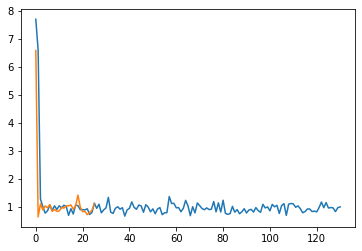

In [0]:
plt.plot(log['loss'])
plt.plot(log['val_loss'])

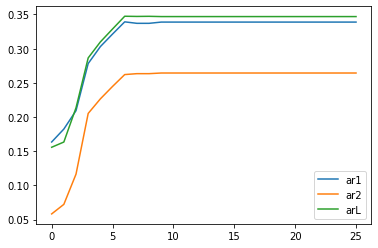

In [0]:
plt.plot(log['ar1'], label='ar1')
plt.plot(log['ar2'], label='ar2')
plt.plot(log['arL'], label='arL')
plt.legend()

save trained weights

In [0]:
# with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/word_encoder_weights_final.pkl', 'wb') as f2:
#     pickle.dump(word_encoder.get_weights(), f2)
# with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/sent_encoder_weights_final.pkl', 'wb') as f2:
#     pickle.dump(sent_encoder.get_weights(), f2)
# with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/sentence_prob_weights_final.pkl', 'wb') as f2:
#     pickle.dump(sentence_prob.get_weights(), f2)

# with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/word_encoder_weights.pkl', 'rb') as f2:
#     word_encoder.set_weights(pickle.load(f2))
# with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/sent_encoder_weights.pkl', 'rb') as f2:
#     sent_encoder.set_weights(pickle.load(f2))
# with open('/gdrive/Shared drives/NeuroSummary/data/dai_data/sentence_prob_weights.pkl', 'rb') as f2:
#     sentence_prob.set_weights(pickle.load(f2))

In [0]:
rouge = Rouge()

In [0]:
np.set_printoptions(suppress=True)

In [0]:
def convert_to_text(a):
    s = []
    for item in a:
        try:
            s.append(idx2word[item])
        except:
            s.append('<UNK>')
    return s

def inference(X, idx):
    _x = X[idx]
    
    # print(len(inp))
    h = word_encoder([_x])
    # print('h:', h)
    d = sent_encoder(h)
    # print('d:',d)
    #calculate P(y_j = 1 | h_j, s_j, d) for each docs
    p = np.array(sentence_prob(h, d))[0]
    choose = sorted([(i, p[i]) for i in range(len(p))],key=lambda tup: tup[1])
    # print(choose[:5])
    sen = []
    for c in sorted(choose[:5],key=lambda tup: tup[0]):
        sen += convert_to_text(_x[c[0]])
    # print(''.join(sen))
    return sen

def get_label(X, y, idx):
    choose = [k for k in range(len(X[idx])) if y[idx][k] == 1]
    sen = []
    for c in choose:
        sen += convert_to_text(X[idx][c])
    return sen

def get_true_label(df, idx):
    return df['headline'].iloc[idx]

def eval(idx):
    rouge = Rouge()
    hyp = inference(X_test, idx)
    label = get_label(X_test, y_test, idx)
    print('hyp', ''.join(hyp))
    print('label', ''.join(label))
    t = rouge.get_scores(' '.join(hyp), ' '.join(label))[0]
    return t

def try_rouge():
    res = []
    for i in range(len(X_test[:50])):
        rouge = Rouge()
        hyp = inference(X_test, i)
        label = get_label(X_test, y_test, i)
        t = rouge.get_scores(' '.join(hyp), ' '.join(label))[0]
        res.append((t['rouge-1']['f'], t['rouge-2']['f'], t['rouge-l']['f']))
    ar1 = np.mean([k[0] for k in res])
    ar2 = np.mean([k[1] for k in res])
    arL = np.mean([k[2] for k in res])
    print('-----------------------------------------')
    print('avg r1 (f):', ar1)
    print('avg r2 (f):', ar2)
    print('avg rL (f):', arL)
    print('-----------------------------------------')
    return (ar1,ar2,arL)

def model_predict(st):
    sen = pythainlp.tokenize.word_tokenize(st, engine='deepcut')
    sen2 = list(sen)
    for i in range(len(sen)):
        try:
            sen[i] = word2idx[sen[i]]
        except:
            sen[i] = word2idx['<UNK>']
    sentences = []
    ans = []
    for i in range(0, len(sen), 5):
        sentences.append(sen[i: i+5])
        ans.append(sen2[i: i+5])
    inp = np.array(tf.keras.preprocessing.sequence.pad_sequences(sentences, padding='post'))
    # print(len(inp))
    h = word_encoder([inp])
    # print('h:', h)
    d = sent_encoder(h)
    # print('d:',d)
    #calculate P(y_j = 1 | h_j, s_j, d) for each docs
    p = np.array(sentence_prob(h, d))[0]
    choose = sorted([(i, p[i]) for i in range(len(p))],key=lambda tup: tup[1])
    # print(choose[:5])
    sen = []
    for c in sorted(choose[:5],key=lambda tup: tup[0]):
        sen += ans[c[0]]
    print(''.join(sen))
    return sen

In [0]:
st = input()

“ยุติธรรม” เตรียมความพร้อมร่วมกับองค์กรปกครองส่วนท้องถิ่น เพื่อส่งเสริมการดำเนินงานของศูนย์ยุติธรรมชุมชน กระทรวงยุติธรรม เตรียมความพร้อมร่วมกับองค์กรปกครองส่วนท้องถิ่น เพื่อส่งเสริมการดำเนินงานของศูนย์ยุติธรรมชุมชน ในวันพฤหัสบดีที่ ๒๗ กันยายน ๒๕๖๑ เวลา ๐๙.๐๐ น. นางกรรณิการ์ แสงทอง รองปลัดกระทรวงยุติธรรม เป็นประธานการประชุมเชิงปฏิบัติการ โครงการวิจัยศักยภาพและความพร้อมขององค์กรปกครองส่วนท้องถิ่น ในการส่งเสริมการดำเนินงานศูนย์ยุติธรรมชุมชน : กิจกรรมของหน่วยงานที่เกี่ยวข้อง ครั้งที่ ๑ เพื่อแลกเปลี่ยนความคิดเห็นในการศึกษาศักยภาพและความพร้อมขององค์กรปกครองส่วนท้องถิ่น ในการดำเนินงานศูนย์ยุติธรรมชุมชนและศึกษาความต้องการของชุมชน ในการดำเนินงานยุติธรรมชุมชนในพื้นที่โดยมีผู้แทนจากหน่วยงานที่เกี่ยวข้อง เข้าร่วมประชุมฯ ณ โรงแรม อมารี ดอนเมือง แอร์พอร์ต กรุงเทพฯ รองปลัดกระทรวงยุติธรรม กล่าวว่า กระทรวงยุติธรรม มีนโยบายให้มีการบูรณาการ การทำงานของส่วนราชการในสังกัด ทั้งในส่วนกลางและระดับจังหวัด เน้นบทบาทหน้าที่ของสำนักงานยุติธรรมจังหวัด และศูนย์ยุติธรรมชุมชน โดยประสานงานกับศูนย์ดำรงธรรม และหน่วยงานอ

In [0]:
model_predict(st)

“ยุติธรรม” เตรียมความพร้อมร่วมกับองค์กรปกครองส่วนท้องถิ่น เพื่อส่งเสริมการดำเนินงานของศูนย์ยุติธรรมชุมชน กระทรวงยุติธรรม เตรียมความ


['“',
 'ยุติธรรม',
 '”',
 ' ',
 'เตรียม',
 'ความ',
 'พร้อม',
 'ร่วม',
 'กับ',
 'องค์กร',
 'ปกครอง',
 'ส่วนท้องถิ่น',
 ' ',
 'เพื่อ',
 'ส่งเสริม',
 'การ',
 'ดำเนิน',
 'งาน',
 'ของ',
 'ศูนย์ยุติธรรมชุมชน',
 ' ',
 'กระทรวงยุติธรรม',
 ' ',
 'เตรียม',
 'ความ']

In [0]:
for i in range(20):
    print('-----------------------------------------')
    eval(i)
    print('-----------------------------------------')

-----------------------------------------
hyp เมื่อวันที่7ก.ย.2561พลตำรวจตรี ประสิทธิ์ เฉลิมวุฒิศักดิ์เลขาธิการคณะกรรมการคุ้มครองผู้บริโภคสำนักงานคณะกรรมการคุ้มครองผู้บริโภคชี้แจงประเด็นผลิตภัณฑ์เสริมอาหารน้ำพลูคาวจากกรณี
label ผลิตภัณฑ์เสริมอาหารน้ำพลูคาว
-----------------------------------------
-----------------------------------------
hyp เมื่อวันที่28สิงหาคม2561นายจุลพงษ์ ทวีศรีโดยมีนายสดุดี พุทธังนายอำเภอโกสัมพีนครจังหวัดกำแพงเพชรพร้อมด้วยเจ้าหน้าที่อุตสาหกรรมจังหวัดกำแพงเพชรให้การต้อนรับนอกจากนี้ยังได้
label ลงพื้นที่เพื่อตรวจเยี่ยมนโยบายของรัฐบาลและจังหวัดกำแพงเพชร
-----------------------------------------
-----------------------------------------
hyp วันนี้25พฤษภาคม2561พลโท สรรเสริญ แก้วกำเนิดโฆษกประจำสำนักนายกรัฐมนตรีกล่าวถึงกรณีที่มีการแชร์ข้อความและภาพระบุประยุทธ์ขอประชาชนจ่ายภาษีมูลค่า
label ไม่มีแนวคิดที่จะปรับขึ้นภาษีVATตื่นตระหนกและหลงเชื่อหรือนายกทำโพลสอบถามประชาชนทำหน้าที่ทุกอย่างให้จะเป็นผู้ตัดสินเอง
-----------------------------------------
-------------------------

test model

In [0]:
res = []
for i in tqdm_notebook(range(len(X_test[:100]))):
    rouge = Rouge()
    hyp = inference(X_test, i)
    label = get_label(X_test, y_test, i)
    t = rouge.get_scores(' '.join(hyp), ' '.join(label))[0]
    res.append((t['rouge-1']['f'], t['rouge-2']['f'], t['rouge-l']['f']))
print('avg r1 (f):', np.mean([k[0] for k in res]))
print('avg r2 (f):', np.mean([k[1] for k in res]))
print('avg rL (f):', np.mean([k[2] for k in res]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



avg r1 (f): 0.3394582071861234
avg r2 (f): 0.2615291694392282
avg rL (f): 0.3449876990563815


In [0]:
res = []
for i in tqdm_notebook(range(len(X_test))):
    rouge = Rouge()
    hyp = inference(X_test, i)
    label = get_label(X_test, y_test, i)
    t = rouge.get_scores(' '.join(hyp), ' '.join(label))[0]
    res.append((t['rouge-1']['f'], t['rouge-2']['f'], t['rouge-l']['f']))
print('avg r1 (f):', np.mean([k[0] for k in res]))
print('avg r2 (f):', np.mean([k[1] for k in res]))
print('avg rL (f):', np.mean([k[2] for k in res]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



avg r1 (f): 0.34669860899201005
avg r2 (f): 0.2700534512326033
avg rL (f): 0.348491991862085


test generated labels

In [0]:
res = []
for i in tqdm_notebook(range(len(X_test[:300]))):
    rouge = Rouge()
    hyp = get_true_label(test_set, i)
    label = get_label(X_test, y_test, i)
    t = rouge.get_scores(' '.join(hyp), ' '.join(label))[0]
    res.append((t['rouge-1']['f'], t['rouge-2']['f'], t['rouge-l']['f']))
print('avg r1 (f):', np.mean([k[0] for k in res]))
print('avg r2 (f):', np.mean([k[1] for k in res]))
print('avg rL (f):', np.mean([k[2] for k in res]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



avg r1 (f): 0.5335531706688063
avg r2 (f): 0.4223716405159349
avg rL (f): 0.5250223363527889
